In [1]:
#import moduls
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

#check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

<ipython-input-1-c0eb63d58f64>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # primary data structure library


Matplotlib version:  3.5.2


In [42]:
#fetching the data
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df_can = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [33]:
#check the data
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [34]:
#check how many entries in dataset
print(df_can.shape)

(195, 39)


In [35]:
#set the name "country" as an index
df_can.set_index('Country', inplace=True)

#view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
#check how many entries in dataset after transformation
print(df_can.shape)

(195, 38)


In [9]:
#create a list of year
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [36]:
#LINE PLOT
#created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.

#create df with only years column
df_line = df_can[years]

#apply sum to get total imigrant
total = df_line.sum()
total

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

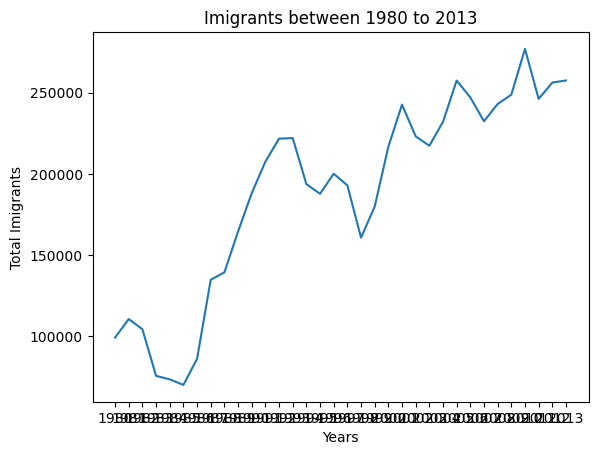

In [12]:
#create figure and axes
fig, ax = plt.subplots()

#plot the line 
ax.plot(total)

#set the title and labels
ax.set_title('Imigrants between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Imigrants')

#display the plot
plt.show


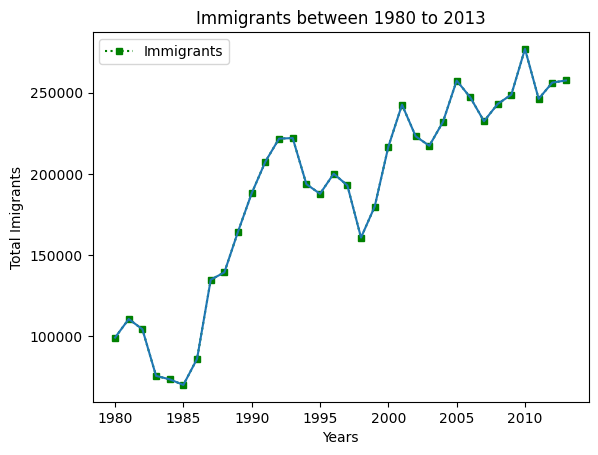

In [37]:
#change the type of index value to int for plotting

#create figure and axes
fig, ax = plt.subplots()

#custom the index type to int
total.index = total.index.map(int)

#customizing the appearance of plot
ax.plot(total, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted")
        
#plot the line 
ax.plot(total)

#set the title and labels
ax.set_title('Immigrants between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Imigrants')
ax.legend(['Immigrants'])

#display the plot
plt.show()


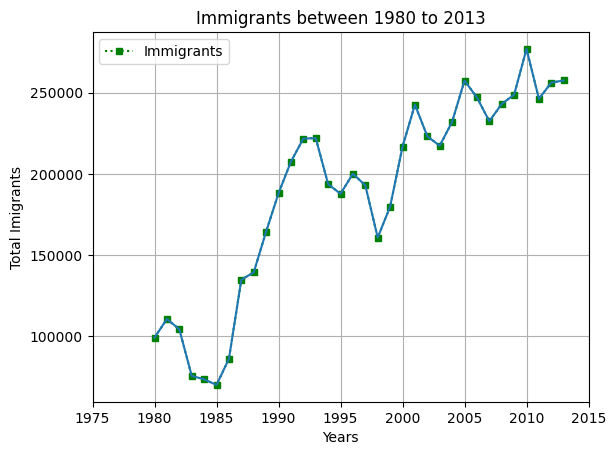

In [31]:
#include the background grid, a legend and try to change the limits on the axis

#create figure and axes
fig, ax = plt.subplots()

#custom the index type to int
total.index = total.index.map(int)

#customizing the appearance of plot
ax.plot(total, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted")
        
#plot the line 
ax.plot(total)

#set the title and labels
ax.set_title('Immigrants between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Imigrants')
ax.legend(['Immigrants'])

#limit on x axis
plt.xlim(1975, 2015)

#enabling grid
plt.grid(True)

#display the plot
plt.show()

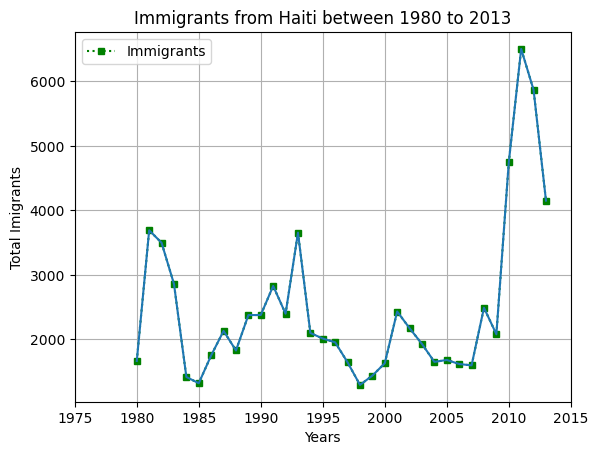

In [38]:
#Question 1: Plot The Line Graph of Immigration from Haiti

#create df data series
df_can.reset_index(inplace=True)
haiti = df_can[df_can['Country']=='Haiti']

#create haiti with only years column from 1980-2013 and transpose it
haiti=haiti[years].T

#convert index to int
haiti.index = haiti.index.map(int)

#create figure and axes
fig, ax = plt.subplots()

#customizing the appearance of plot
ax.plot(haiti, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted")
        
#plot the line 
ax.plot(haiti)

#set the title and labels
ax.set_title('Immigrants from Haiti between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Imigrants')
ax.legend(['Immigrants'])

#limit on x axis
plt.xlim(1975, 2015)

#enabling grid
plt.grid(True)

#display the plot
plt.show()

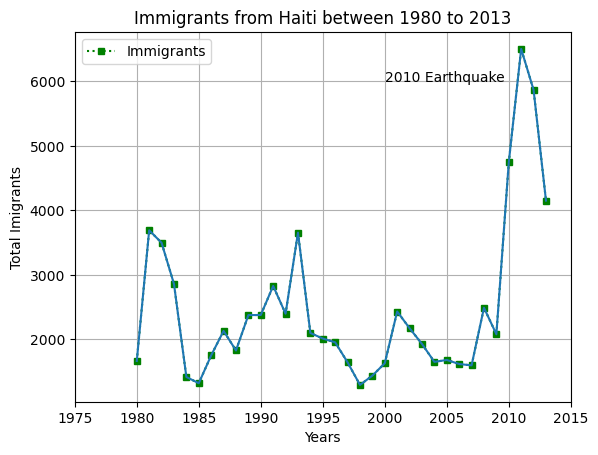

In [39]:
#Question 1: Plot The Line Graph of Immigration from Haiti
#witn annotation

#create figure and axes
fig, ax = plt.subplots()

#customizing the appearance of plot
ax.plot(haiti, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted")
        
#plot the line 
ax.plot(haiti)

#set the title and labels
ax.set_title('Immigrants from Haiti between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Imigrants')
ax.legend(['Immigrants'])
ax.annotate('2010 Earthquake', xy = (2000, 6000))

#limit on x axis
plt.xlim(1975, 2015)

#enabling grid
plt.grid(True)

#display the plot
plt.show()

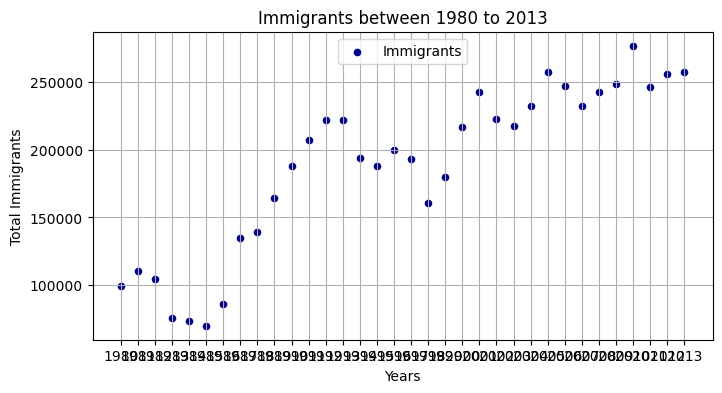

In [41]:
#SCATTER PLOT
#visualize the immigrants (to Canada) trend during 1980 to 2013

#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

#custom the index type to int
total.index = total.index.map(int)

# Customizing Scatter Plot 
ax.scatter(years, total, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title, label, grid, and legend
plt.title('Immigrants between 1980 to 2013')  
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
plt.grid(True)
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

In [43]:
#BAR PLOT
#create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013

#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df_can.head()

#resetting the index back to original way
df_bar_5=df_top5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.Country)
label


['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [44]:
#fix the label of United Kingdom
label[2]='UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

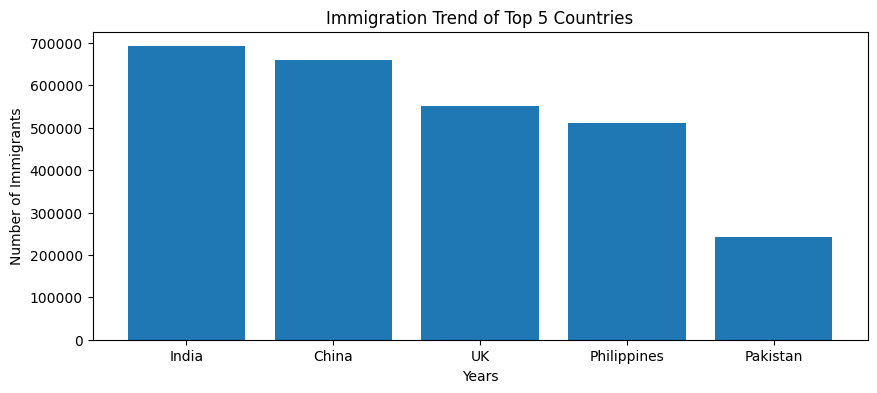

In [45]:
#plot the data
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

In [46]:
#Question 3
#Create a bar plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013

#Sorting the dataframe on 'Total' in ascending order
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# get the top 5 entries with head function
df_least5 = df_can.head()

#resetting the index back to original way
df_least5_bar=df_least5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_least5_bar.Country)
label


['Palau', 'Western Sahara', 'Marshall Islands', 'New Caledonia', 'San Marino']

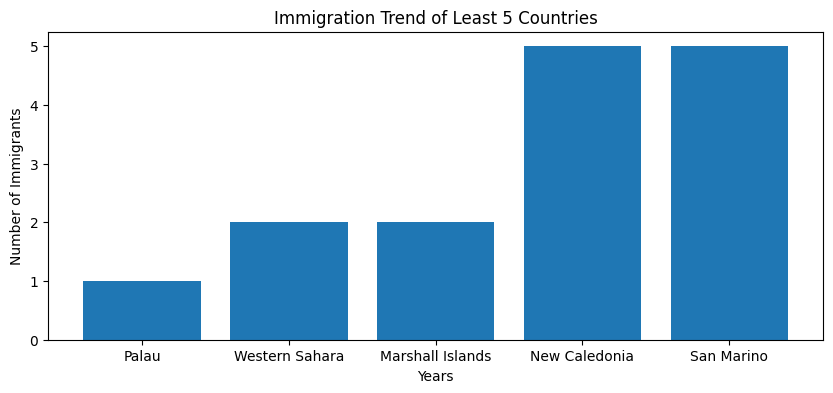

In [48]:
#plot the data
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_least5_bar['Total'], label=label)
ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

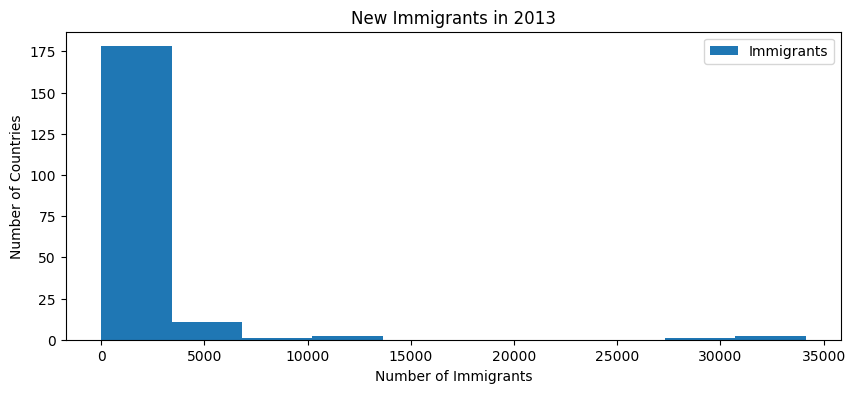

In [49]:
#Histogram
#find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013

#create data frame
df_country = df_can.groupby(['Country'])['2013'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_country['2013'])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

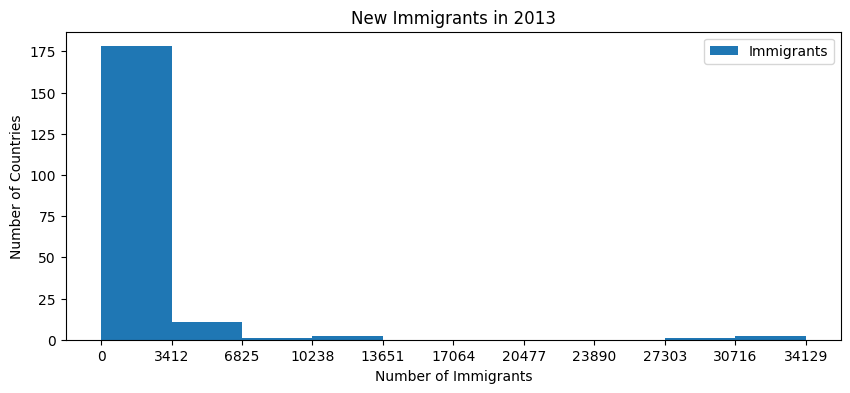

In [50]:
#fix the bin

# Plot the bar
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int,count[1])))
ax.legend(['Immigrants'])

#Display the plot
plt.show()

In [51]:
#What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

#view the dataset 
df=df_can.groupby(['Country'])[years].sum()
df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


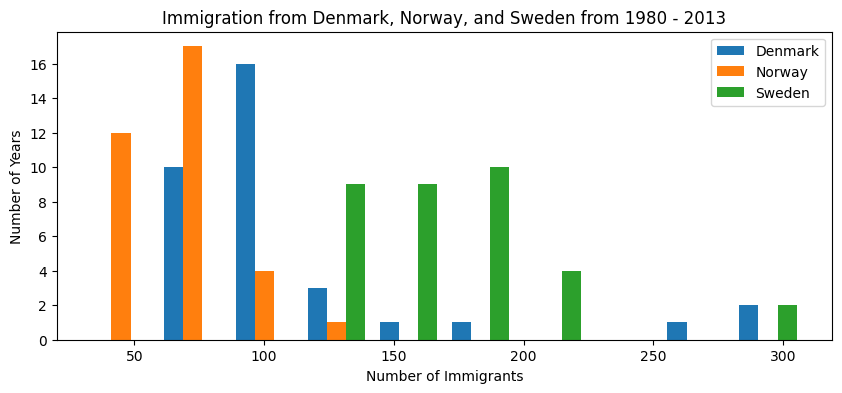

In [52]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

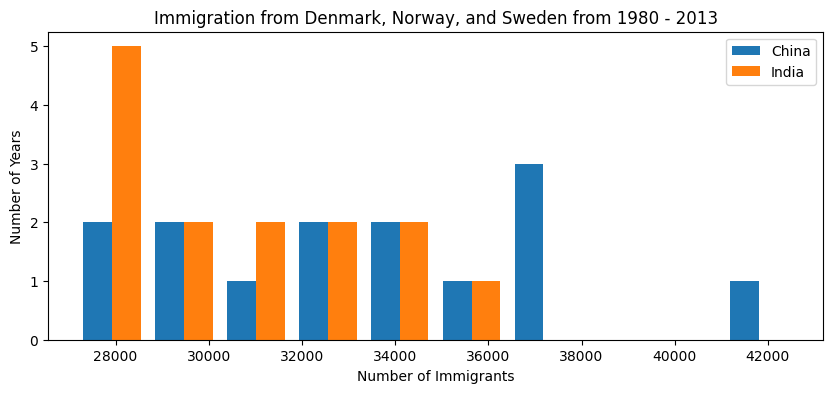

In [53]:
#Question 5
#What is the immigration distribution for China and India for years 2000 to 2013?

#view the dataset 
df=df_can.groupby(['Country'])[years].sum()
y=list(map(str,range(2000, 2014)))
df_ci=df.loc[['China', 'India'], y]
df_ci=df_ci.T

#df_ci
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_ci)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China', 'India'])

#Display the plot
plt.show()

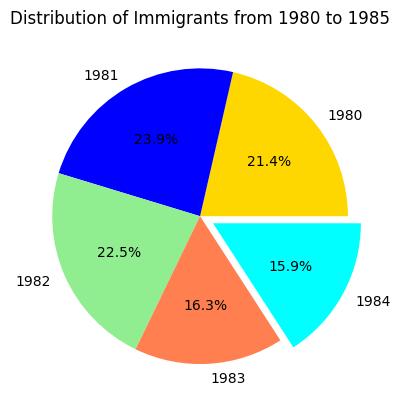

In [55]:
#PIE CHART
#create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985

fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total[0:5], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')

#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

In [56]:
#Create a pie chart representing the total immigrants proportion for each continent

#Creating data for plotting pie
df_con=df_can.groupby('Continent')['Total'].sum().reset_index()
label=list(df_con.Continent)
label[3] = 'LAC'
label[4] = 'NA'
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


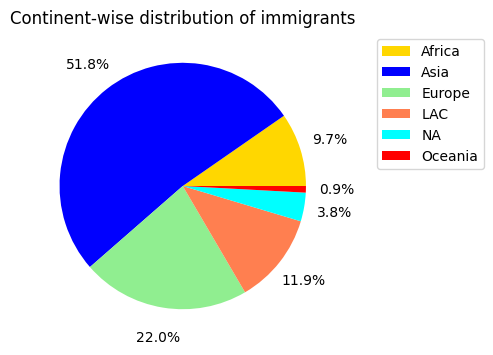

In [57]:
fig,ax=plt.subplots(figsize=(10, 4))

#Pie on immigrants
ax.pie(df_con['Total'], colors = ['gold','blue','lightgreen','coral','cyan','red'],
autopct='%1.1f%%', pctdistance=1.25)

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Continent-wise distribution of immigrants')
ax.legend(label,bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

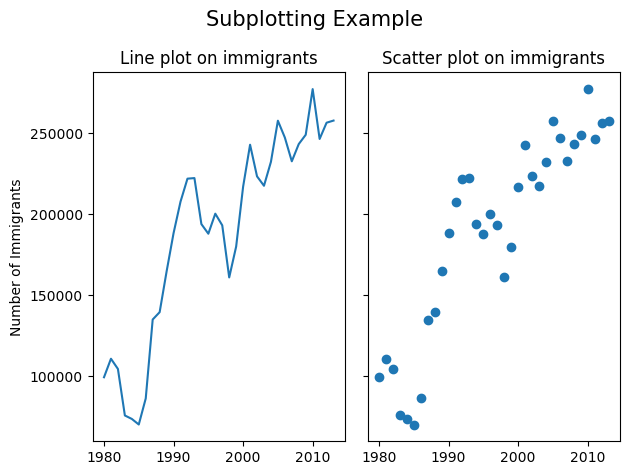

In [63]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total.index, total)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

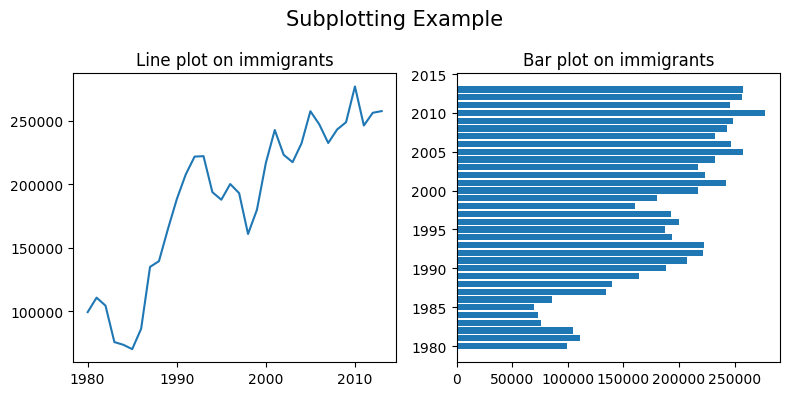

In [65]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total.index, total) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

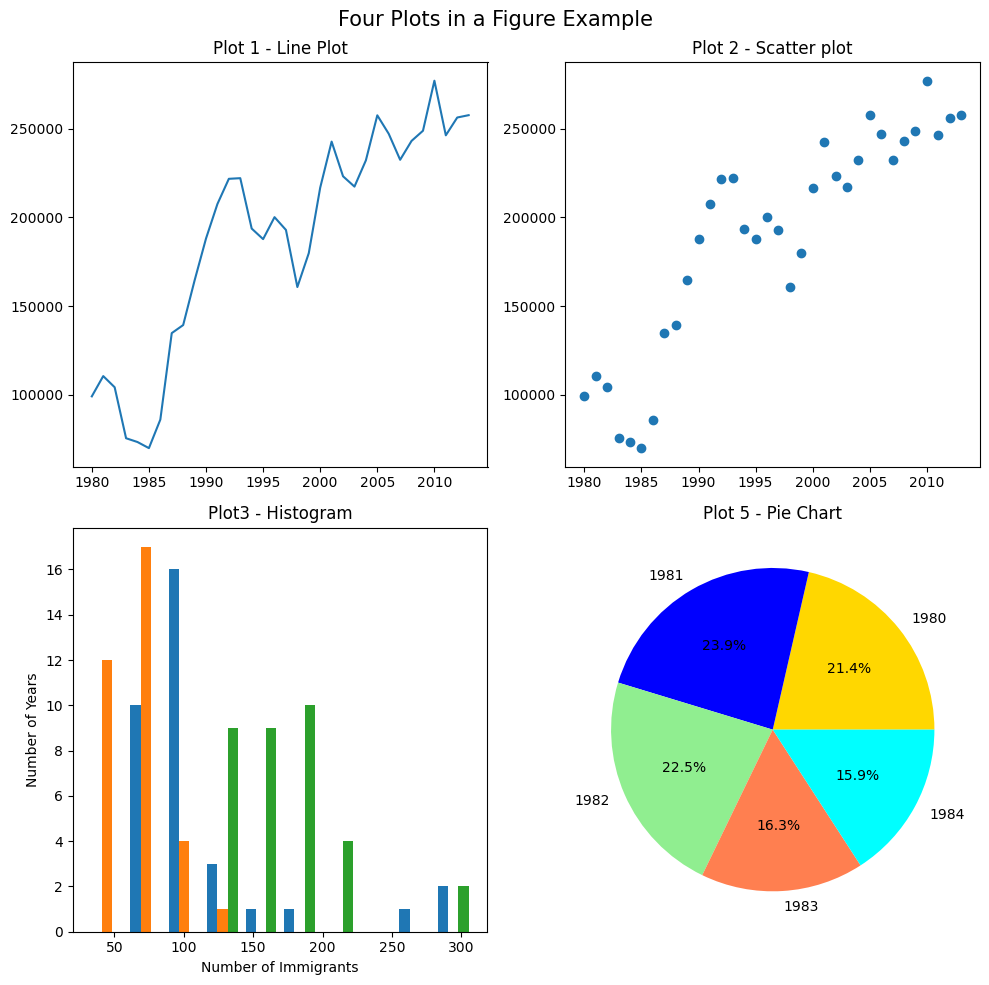

In [66]:
#Question
#Choose any four plots, which you have developed in this lab, with subplotting display them in a 2x2 display

# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10, 10))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total)
ax1.set_title('Plot 1 - Line Plot')

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total.index, total)
ax2.set_title('Plot 2 - Scatter plot')

# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title('Plot3 - Histogram') 
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total[0:5], labels=years[0:5], 
           colors = ['gold','blue','lightgreen','coral','cyan'],
           autopct='%1.1f%%')
ax4.set_aspect('equal')  
ax4.set_title('Plot 5 - Pie Chart')

#Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()